Exercise: _Implement Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset._

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [13]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [56]:
iris.data.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
X, y = iris.data[['petal length (cm)','petal width (cm)']].to_numpy(), iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [58]:
softmax_reg = LogisticRegression()
softmax_reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
predictions = softmax_reg.predict_proba(X_test).round(2)
predictions

array([[0.  , 0.82, 0.17],
       [0.94, 0.06, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.01, 0.78, 0.21],
       [0.  , 0.69, 0.3 ],
       [0.96, 0.04, 0.  ],
       [0.07, 0.91, 0.02],
       [0.  , 0.1 , 0.9 ],
       [0.01, 0.78, 0.21],
       [0.03, 0.94, 0.03],
       [0.  , 0.2 , 0.8 ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.64, 0.36],
       [0.  , 0.03, 0.97],
       [0.03, 0.94, 0.02],
       [0.01, 0.85, 0.14],
       [0.  , 0.04, 0.96],
       [0.95, 0.05, 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.05, 0.94],
       [0.  , 0.01, 0.99],
       [0.  , 0.08, 0.92],
       [0.  , 0.07, 0.93],
       [0.  , 0.02, 0.98],
       [0.97, 0.03, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.01, 0.85, 0.14],
       [0.95, 0.05, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.  , 0.29, 0.71],
       [0.01, 0.78, 0.21],
 

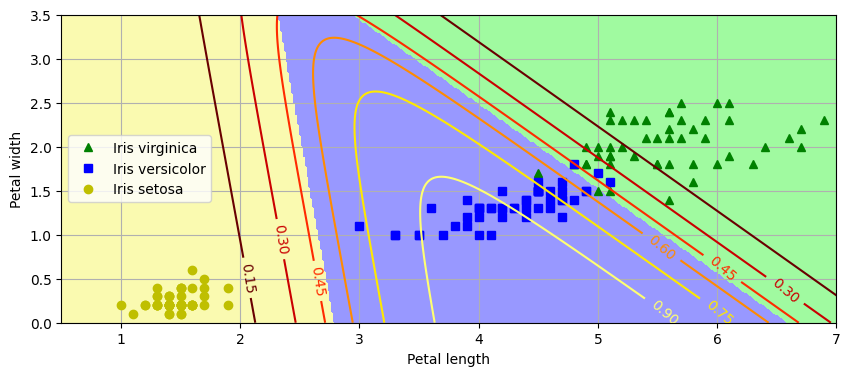

In [60]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
# Here we need to 
epochs = 10
lr = 0.001
for epoch in range(epochs):
    # Train the model
	softmax_reg.fit(X_train,y_train)
	# Calculate the predictions and the error
	predictions = softmax_reg.predict_proba()
	# Get the updated weights for the model
	# We need to save the best model so we compare the error

In [ ]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)